In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 
cwd = "..\\..\\"
cwd_Images_Raw = cwd + "\\Sentinel-2 Images Raw"
cwd_Images_Processed = cwd + "\\Sentinel-2 Images Processed"
cwd_Images_Results = cwd + "\\Sentinel-2 Images Results"

In [4]:
df_HI = pd.read_excel(cwd + "\\Results\\Final (101 Sites) HI, Roman, Info.xlsx", sheet_name="Homogeneity", header = 1)
df_HI.head()

,Site,HI 100,HI 300,HI 600,HI 900,HI Total,Mean 100,CV 100,Sill 100,Mean 300,CV 300,Sill 300,Mean 600,CV 600,Sill 600,Mean 900,CV 900,Sill 900,Variogram Fitting
0,ATGE,0.170805,0.095657,0.125819,0.090197,0.120620,33.181359,0.478179,267.887789,48.371770,0.428943,449.836840,41.930180,0.505233,453.765630,39.846735,0.502820,438.814722,Good
1,ATLAS-Mohammed V,0.004254,0.004597,0.018104,0.024708,0.012916,25.873968,0.170407,18.800881,26.986262,0.236488,39.292309,26.500908,0.368487,89.614443,24.175811,0.461659,131.031057,Good
2,ATLAS-Mohammed V New,0.012867,0.008624,0.009251,0.012750,0.010873,33.403125,0.211488,45.697188,32.946413,0.245076,71.057738,32.622097,0.242688,69.552466,30.546036,0.314551,99.274666,Good
3,AT-Mmg,0.000256,0.000093,0.000121,0.000133,0.000151,31.809015,0.059300,3.316349,32.168508,0.056158,3.442307,32.875859,0.058228,3.904039,33.644299,0.065007,5.146960,Bad
4,BASP,0.000013,0.000529,0.011413,0.010570,0.005631,10.040617,0.050378,0.280141,10.788520,0.208518,5.202114,13.197787,0.495998,42.031719,12.972777,0.550165,47.130686,Good


In [5]:
df_HI.describe()

,HI 100,HI 300,HI 600,HI 900,HI Total,Mean 100,CV 100,Sill 100,Mean 300,CV 300,Sill 300,Mean 600,CV 600,Sill 600,Mean 900,CV 900,Sill 900
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.020773,0.036421,0.073328,0.069348,0.049967,44.185109,0.162045,58.851031,44.368676,0.248111,161.969690,44.383353,0.303225,247.143392,44.124392,0.342054,312.428366
std,0.048951,0.097001,0.158239,0.130065,0.099727,27.628382,0.173720,107.026158,24.245983,0.228560,313.552139,21.815847,0.253385,382.234675,20.706754,0.228254,436.833760
min,0.000000,0.000000,0.000000,0.000000,0.000000,5.898007,0.012438,0.083282,5.935680,0.045821,0.090163,5.938954,0.048321,0.114099,5.943672,0.065007,0.150287
25%,0.001082,0.001255,0.003157,0.005850,0.003758,25.854080,0.082698,9.540685,27.451465,0.109265,20.670957,28.050356,0.138381,41.084876,29.386773,0.189441,69.600796
50%,0.003323,0.003967,0.009140,0.013138,0.008330,38.850733,0.119552,21.656021,41.314744,0.178331,49.942401,41.054542,0.212261,79.575313,40.959173,0.260669,129.287397
75%,0.010895,0.016186,0.041484,0.071223,0.038932,57.405886,0.197959,54.840170,59.097650,0.264249,136.034749,57.803533,0.363629,234.870326,56.697839,0.437470,286.996475
max,0.336058,0.775615,0.900827,0.607759,0.655065,196.796193,1.524242,749.817855,155.974226,1.398979,2016.824986,129.026158,1.278019,1821.772776,118.850169,1.111468,2445.577708


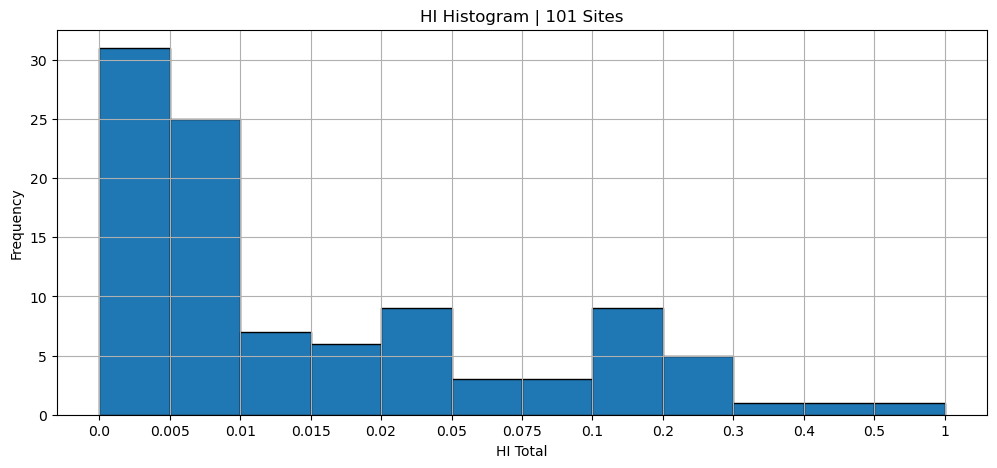

In [13]:
# Set figure size
plt.figure(figsize=(12,5))
plt.title("HI Histogram | 101 Sites")

# Generate some sample data
data = df_HI['HI Total']

# Custom bin edges
bins = [float(i) / 200 for i in range(0,5,1)] + [0.05,0.075,0.1,0.2,0.3,0.4,0.5,1]

# Calculate the histogram manually
hist, edges = np.histogram(data, bins=bins)

# Custom x-tick positions for even spacing
even_positions = np.linspace(0, len(bins) - 1, len(bins))

# Plot custom bars at even positions
plt.bar(even_positions[:-1], hist, width=1, align='edge', edgecolor='black')

# Set the x-ticks to these positions
plt.gca().set_xticks(even_positions)
plt.gca().set_xticklabels(bins)

# Set labels
plt.xlabel('HI Total')
plt.ylabel('Frequency')

# Display the plot
plt.grid()
plt.show()


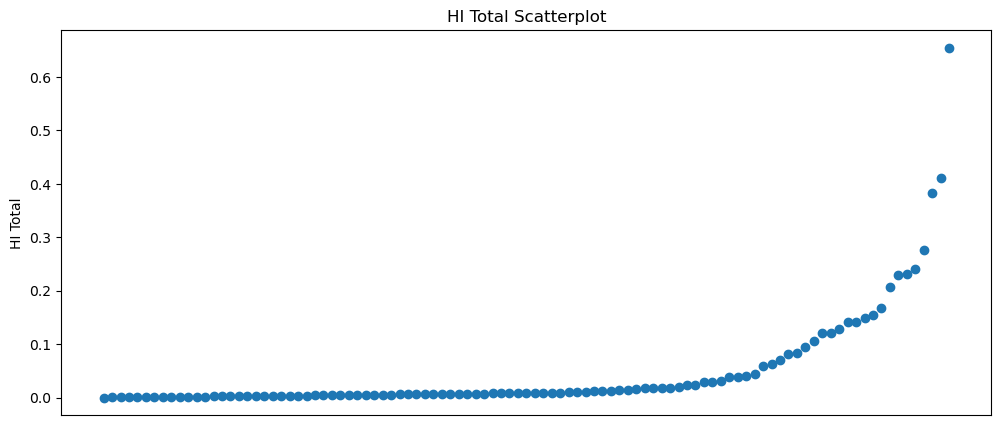

In [24]:
plt.figure(figsize=(12,5))
plt.title("HI Total Scatterplot")
plt.scatter(df_HI['Site'],df_HI.sort_values("HI Total")['HI Total'])
plt.xticks([])
plt.xlabel("")
plt.ylabel("HI Total")
plt.show()

In [10]:
x_ticks_array = [float(i)/20 for i in range(0,16)]

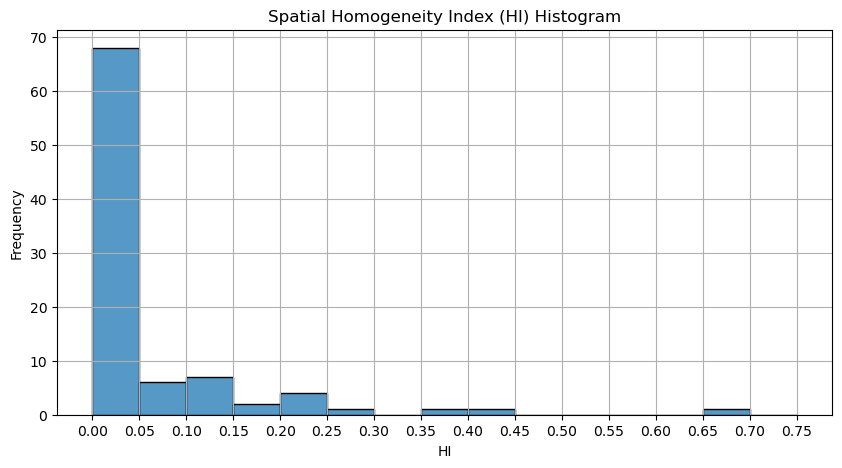

In [13]:
plt.figure(figsize=(10,5))
plt.title("Spatial Homogeneity Index (HI) Histogram")
plt.xticks(x_ticks_array)
data = df['HI Total']
ax = sns.histplot(data, bins=x_ticks_array, kde = False)
plt.xlabel('HI')
plt.ylabel('Frequency')
plt.grid()
plt.show()

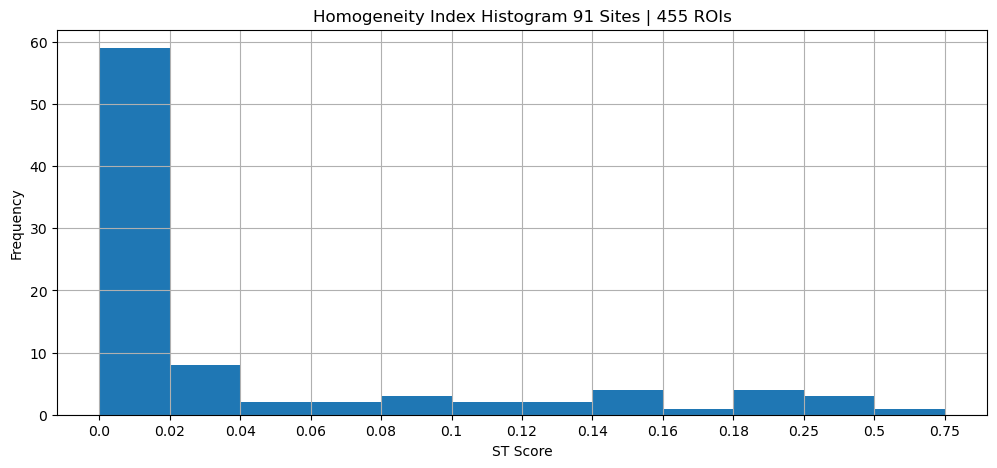

In [14]:
# Set figure size
plt.figure(figsize=(12,5))
plt.title("Homogeneity Index Histogram 91 Sites | 455 ROIs")

# Generate some sample data
data = df['HI Total']

# Custom bin edges
bins = [float(i) / 50 for i in range(0,10,1)] + [0.25,0.5,0.75]
    
# Calculate the histogram manually
hist, bin_edges = np.histogram(data, bins=10) 

# Calculate the histogram manually
hist, edges = np.histogram(data, bins=bins)

# Custom x-tick positions for even spacing
even_positions = np.linspace(0, len(bins) - 1, len(bins))

# Plot custom bars at even positions
plt.bar(even_positions[:-1], hist, width=1, align='edge')

# Set the x-ticks to these positions
plt.gca().set_xticks(even_positions)
plt.gca().set_xticklabels(bins)
        

# Set labels
plt.xlabel('ST Score')
plt.ylabel('Frequency')

# Display the plot
plt.grid()
plt.show()


In [15]:
df.describe()

,HI 100,HI 300,HI 600,HI 900,HI Total
count,91.000000,91.000000,91.000000,91.000000,91.000000
mean,0.022589,0.040155,0.080904,0.075729,0.054844
std,0.051253,0.101546,0.165029,0.135532,0.103954
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.001095,0.001309,0.003223,0.006109,0.004096
50%,0.003587,0.005021,0.011235,0.014052,0.008784
75%,0.014613,0.018593,0.072758,0.079840,0.052194
max,0.336058,0.775615,0.900827,0.607759,0.655065
